In [ ]:
# Importando bibliotecas necessárias
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df['age'] = df['age'].fillna(df['age'].median())

In [ ]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [ ]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
df.drop(columns="deck", inplace = True)

In [ ]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [ ]:
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,Southampton,no,True


In [ ]:
X = df[['pclass', 'sex', 'age', 'sibsp','fare']]
y = df['survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Treinando o modelo de Árvore de Decisão
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predição e avaliação
y_pred_tree = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, y_pred_tree)

# Validação Cruzada com 5 folds
tree_cv_scores = cross_val_score(tree_model, X_train, y_train, cv=5)

print(f'Acurácia da Árvore de Decisão: {tree_accuracy:.2f}')
print(f'Acurácia Média da Validação Cruzada (5 folds): {tree_cv_scores.mean():.2f}')

Acurácia da Árvore de Decisão: 0.73
Acurácia Média da Validação Cruzada (5 folds): 0.76


In [ ]:

# Treinando o modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predição e avaliação
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Validação Cruzada com 5 folds
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

print(f'Acurácia do Random Forest: {rf_accuracy:.2f}')
print(f'Acurácia Média da Validação Cruzada (5 folds): {rf_cv_scores.mean():.2f}')

Acurácia do Random Forest: 0.80
Acurácia Média da Validação Cruzada (5 folds): 0.81


In [ ]:
# GridSearchCV na Floresta Aleatória
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

best_rf_params = grid_rf.best_params_
best_rf_score = grid_rf.best_score_

print(best_rf_params)
print(best_rf_score)

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
0.8313995863291638


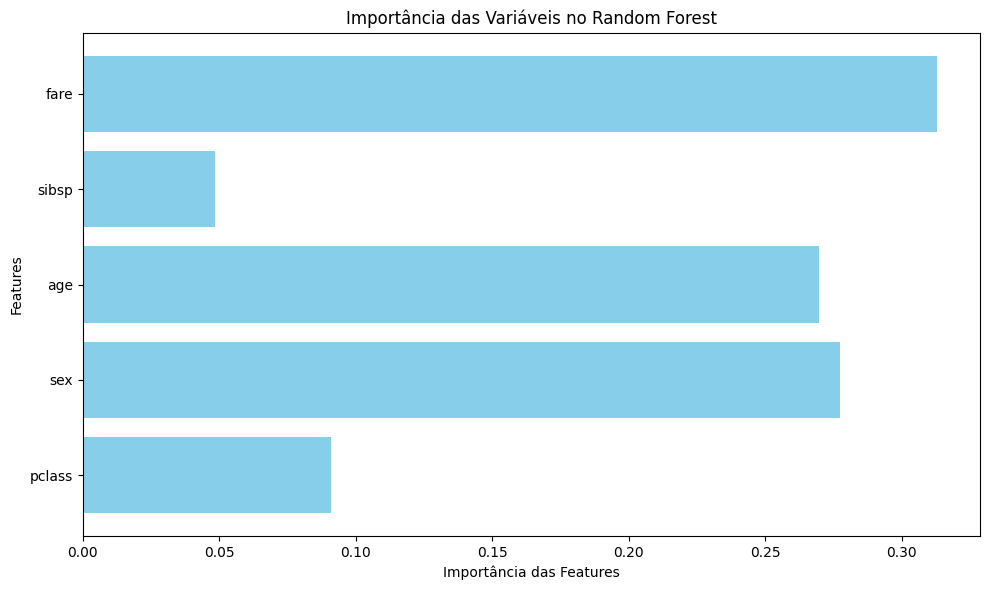

In [ ]:
# Importância das features no Random Forest
importances = rf_model.feature_importances_
features = X.columns

# Gerando gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Variáveis no Random Forest')
plt.tight_layout()
plt.show()


In [ ]:
print(df[0:30])

    survived  pclass  sex   age  sibsp  parch      fare  embarked   class  \
0          0       3    1  22.0      1      0    7.2500         2   Third   
1          1       1    0  38.0      1      0   71.2833         0   First   
2          1       3    0  26.0      0      0    7.9250         2   Third   
3          1       1    0  35.0      1      0   53.1000         2   First   
4          0       3    1  35.0      0      0    8.0500         2   Third   
5          0       3    1  28.0      0      0    8.4583         1   Third   
6          0       1    1  54.0      0      0   51.8625         2   First   
7          0       3    1   2.0      3      1   21.0750         2   Third   
8          1       3    0  27.0      0      2   11.1333         2   Third   
9          1       2    0  14.0      1      0   30.0708         0  Second   
10         1       3    0   4.0      1      1   16.7000         2   Third   
11         1       1    0  58.0      0      0   26.5500         2   First   

É possível concluir que, mulheres e crianças tiveram uma chance muito maior de sobreviver, e dependendo do quanto uma pessoa gastou no ticket da viagem, também teria mais chances

<Figure size 640x480 with 0 Axes>

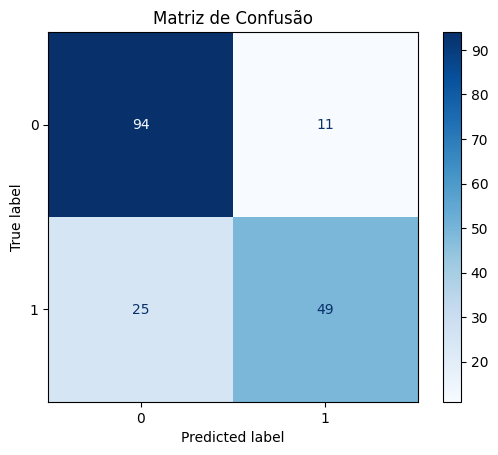

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.82      0.66      0.73        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.79       179



In [ ]:
y_pred = grid_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure()
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()
print(classification_report(y_test, y_pred))

In [ ]:
X = df[['pclass', 'sex', 'age', 'sibsp','fare','embarked','parch']]
y = df['survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Treinando o modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predição e avaliação
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Validação Cruzada com 5 folds
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

print(f'Acurácia do Random Forest: {rf_accuracy:.2f}')
print(f'Acurácia Média da Validação Cruzada (5 folds): {rf_cv_scores.mean():.2f}')

Acurácia do Random Forest: 0.80
Acurácia Média da Validação Cruzada (5 folds): 0.79


In [ ]:
# GridSearchCV na Floresta Aleatória
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

best_rf_params = grid_rf.best_params_
best_rf_score = grid_rf.best_score_

print(best_rf_params)
print(best_rf_score)

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
0.8272037821333595


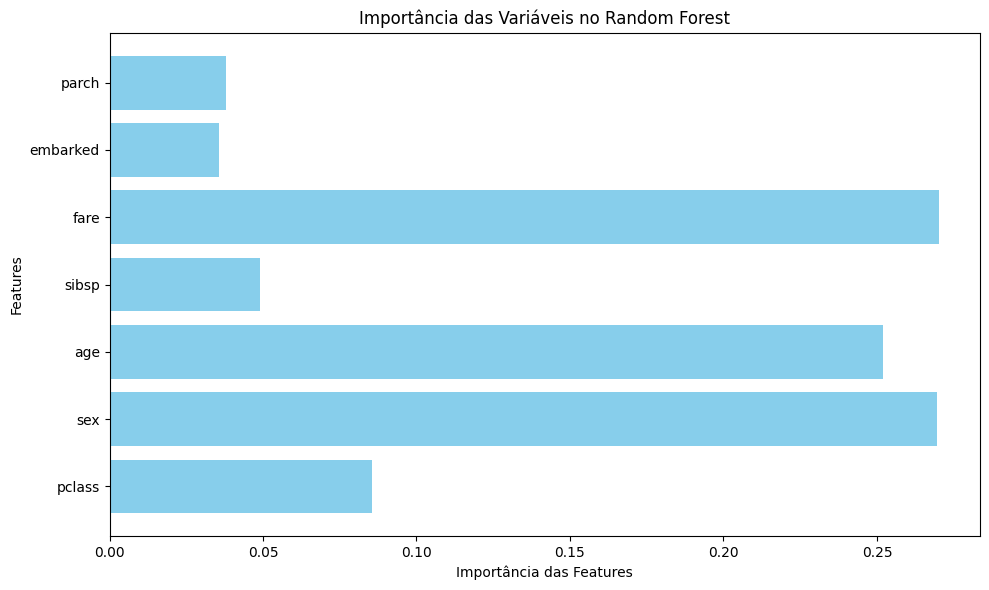

In [ ]:
# Importância das features no Random Forest
importances = rf_model.feature_importances_
features = X.columns

# Gerando gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Variáveis no Random Forest')
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

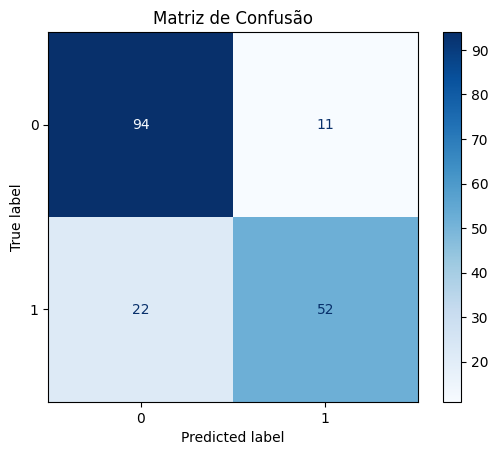

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



In [ ]:
y_pred = grid_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure()
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()
print(classification_report(y_test, y_pred))

Ao adicionar as colunas embarked e parch, podemos observar uma pequena melhora no modelo, tendo um aumento geral nos parâmetros de eficácia